In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)

In [2]:
data=pd.read_csv("googleplaystore.csv1/googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [5]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
# The field name of data
print("The field name of data: ", data.columns)

# Number of fields in data
print("Number of fields in data: ", len(data.columns))

# Number of data in data
print("Number of data in data: ", len(data))

The field name of data:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Number of fields in data:  13
Number of data in data:  10841


In [7]:
# View information such as data field properties and count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Data Cleaning**

In [8]:
# Converting the ratings column to numeric which will turn all the values in the Ratings column to numerical 
# values
data['Rating']=pd.to_numeric(data['Rating'])

In [9]:
# Converting all the values in Reviews to numerical values
arr=data['Reviews']
for i in range(len(arr)):
    if 'M' in arr[i]:
        arr[i]=arr[i].replace('M','')
        arr[i]=float(arr[i])
        arr[i]=arr[i]*1000000
    else:
        arr[i]=float(arr[i])
data['Reviews']=arr

In [10]:
# The size column has M which denotes Mb so we need to make it in numeric values too 
arr=data['Size'].values
vr=[]
for i in range(len(arr)):
    if arr[i]=='Varies with device':
        vr.append(21.51)
    elif 'M' in arr[i]:
        arr[i]=arr[i].replace('M','')
        arr[i]=float(arr[i])
        vr.append(arr[i])
    elif 'k' in arr[i]:
        arr[i]=arr[i].replace('k','')
        arr[i]=float(arr[i])/1000
        vr.append(arr[i])
    elif 'G' in arr[i]:
        arr[i]=arr[i].replace('G','')
        arr[i]=float(arr[i])*1000
        vr.append(arr[i])
    else:
        vr.append(1000)
data['Size']=vr

In [11]:
# Code to convert the Installs to numerical values
arr=data['Installs']
for i in range(len(arr)):
    if arr[i]=='Free':
        arr[i]=1000
    else:
        arr[i]=arr[i].replace('+','').replace(',','')
        arr[i]=float(arr[i])
data['Installs']=arr

In [12]:
# Cleaning the last updated column
months=[ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
arr=data['Last Updated']
p=[]
for i in range(len(arr)):
    if arr[i]=='1.0.19':
        arr[i]='1/1/2019'
    else:
        t=arr[i].split(' ')
        t[0]=str(months.index(t[0])+1)
        t[1]=t[1].replace(',','')
        p.append(t[1]+'/'+t[0]+'/'+t[2])
arr['Last Updated']=p

In [13]:
arr['Last Updated']=pd.to_datetime(data['Last Updated'])

In [14]:
# Clean the android version column
arr=data['Android Ver']
for i in range(len(arr)):
    if type(arr[i])==str:
        arr[i]=arr[i].replace('and up','')
data['Android Ver']=arr

In [15]:
# Converting Price to numerical values
arr=data['Price']
for i in range(len(arr)):
    if '$' in arr[i]:
        arr[i]=arr[i].replace('$','')
        arr[i]=float(arr[i])
    else:
        arr[i]=0
data['Price']=arr

**First Look at the data after cleaning**

In [16]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


This looks much better than before...

In [17]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**VISUALIZATIONS**

Create a Boxplot to check for outliers

<AxesSubplot:xlabel='Rating'>

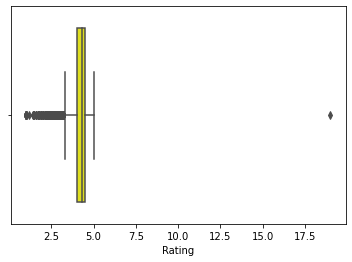

In [18]:
sns.boxplot(data['Rating'],color='yellow')

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Size'}>]], dtype=object)

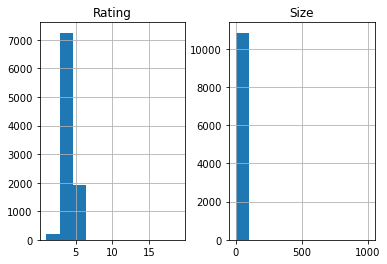

In [19]:
data.hist()

As we see a outlier in the ratings column so lets remove the outlier

In [20]:
data[data['Rating']==19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,1000.0,1000,0,0,NaN,"February 11, 2018",1/1/2019,4.0 and up,NaN


In [21]:
data=data.drop(index=10472,axis=0)

<AxesSubplot:>

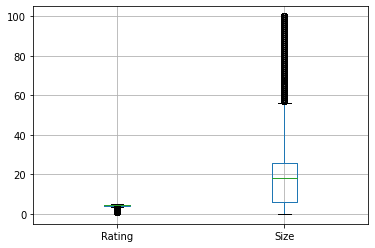

In [22]:
data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Size'}>]], dtype=object)

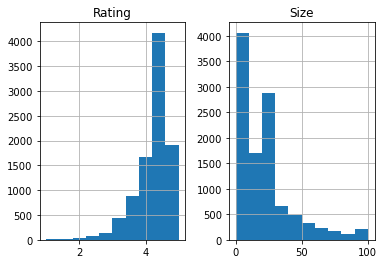

In [23]:
data.hist()

**Removing missing values**

In [24]:
def replace_with_median(series):
    return series.fillna(series.median())

In [25]:
data.Rating = data['Rating'].transform(replace_with_median)

In [26]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [27]:
data[data['Type'].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0.0,21.51,0.0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [28]:
data[data['Current Ver'].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.700,5000.0,Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,0.011,1000000.0,Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.700,500000.0,Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0
6803,BT Master,FAMILY,4.3,0.0,0.222,100.0,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6
7333,Dots puzzle,FAMILY,4.0,179.0,14.000,50000.0,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0
7407,Calculate My IQ,FAMILY,4.3,44.0,7.200,10000.0,Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3
7730,UFO-CQ,TOOLS,4.3,1.0,0.237,10.0,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8.0,0.658,1000.0,Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0


In [29]:
data[data['Android Ver'].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11.0,1000.0,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1,10000.0,Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


For categorical columns its better to replace missing values with mode

In [30]:
data['Type'].mode()

0    Free
dtype: object

In [31]:
data['Type'].fillna(str(data['Type'].mode().values[0]), inplace=True)

In [32]:
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]), inplace=True)

In [33]:
data['Android Ver'].mode()

0    4.1 
dtype: object

In [34]:
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]), inplace=True)

In [35]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


**Converting columns to numerical**

In [37]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


In [38]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [39]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [41]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [42]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,21.515509,1.546434e+07,1.027368
std,0.480342,2.927761e+06,20.747495,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,18.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


**VISUALIZATION CONTINUED...**

In [43]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot:>

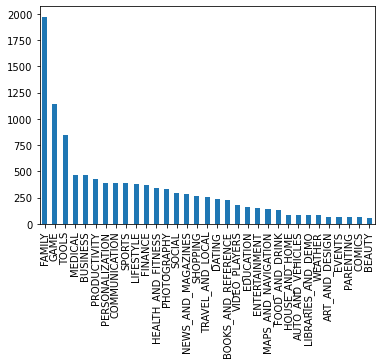

In [44]:
data['Category'].value_counts().plot(kind='bar')

categories with high number of apps are family, game, and tools.

In [45]:
data['Rating'].groupby(data['Category']).mean()

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

In [46]:
data['Reviews'].groupby(data['Category']).mean()

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

In [47]:
data['Price'].groupby(data['Category']).mean()

Category
ART_AND_DESIGN         0.091846
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.518485
BUSINESS               0.402761
COMICS                 0.000000
COMMUNICATION          0.214832
DATING                 0.134316
EDUCATION              0.115128
ENTERTAINMENT          0.053557
EVENTS                 1.718594
FAMILY                 1.234675
FINANCE                7.925765
FOOD_AND_DRINK         0.066772
GAME                   0.251136
HEALTH_AND_FITNESS     0.197478
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011647
LIFESTYLE              6.180288
MAPS_AND_NAVIGATION    0.196715
MEDICAL                3.110065
NEWS_AND_MAGAZINES     0.014064
PARENTING              0.159667
PERSONALIZATION        0.392755
PHOTOGRAPHY            0.400627
PRODUCTIVITY           0.591816
SHOPPING               0.021077
SOCIAL                 0.054136
SPORTS                 0.260417
TOOLS                  0.317023
TRAVEL_AND_LOCAL       0.193605

In [48]:
data['Price'].groupby(data['Category']).sum()

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

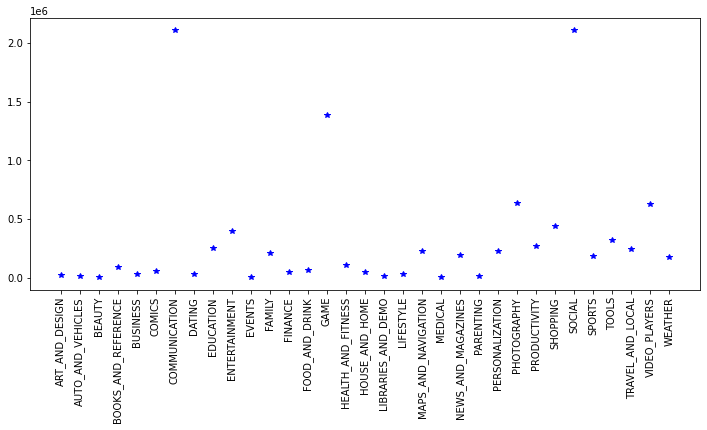

In [49]:
plt.figure(figsize = (12, 5))
plt.plot(data['Reviews'].groupby(data['Category']).mean(), '*', color='blue')
plt.xticks(rotation=90)
plt.show()

thus the above graphs show communication, game and social apps have high number of reviews

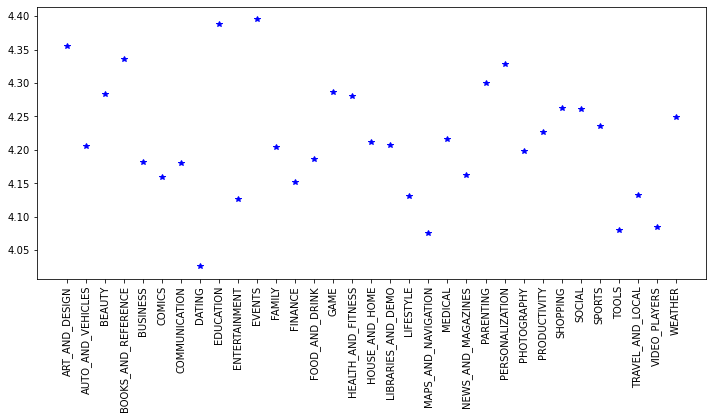

In [50]:
plt.figure(figsize = (12, 5))
plt.plot(data['Rating'].groupby(data['Category']).mean(), '*', color='blue')
plt.xticks(rotation=90)
plt.show()

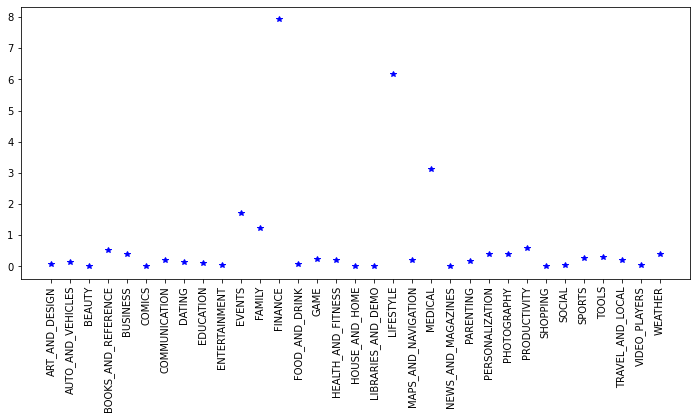

In [51]:
plt.figure(figsize = (12, 5))
plt.plot(data['Price'].groupby(data['Category']).mean(), '*', color='blue')
plt.xticks(rotation=90)
plt.show()

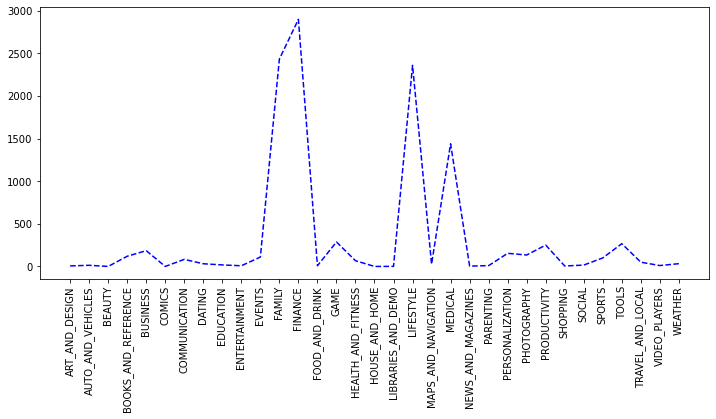

In [52]:
plt.figure(figsize = (12, 5))
plt.plot(data['Price'].groupby(data['Category']).sum(), 'r--', color='blue')
plt.xticks(rotation=90)
plt.show()

Thus Family, finance, lifestyle, medical apps are high priced categories

In [53]:
data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

<AxesSubplot:>

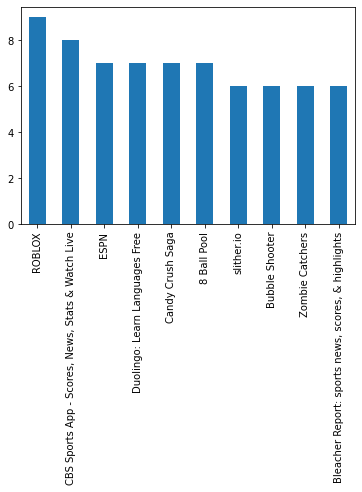

In [54]:
data['App'].value_counts().head(10).plot(kind='bar')

**Category Vs Ratings**

In [55]:
data=data.sort_values('Rating')

In [56]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9,1000.0,Free,0.0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6,100.0,Free,0.0,Everyone,Productivity,"March 15, 2018",41.9,4.1
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21.0,1000.0,Free,0.0,Everyone,Education,"July 27, 2018",5.33.3669,5.0
5151,Clarksburg AH,MEDICAL,1.0,1,28.0,50.0,Free,0.0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13.0,100.0,Free,0.0,Everyone,Communication,"October 6, 2017",1.0,4.1


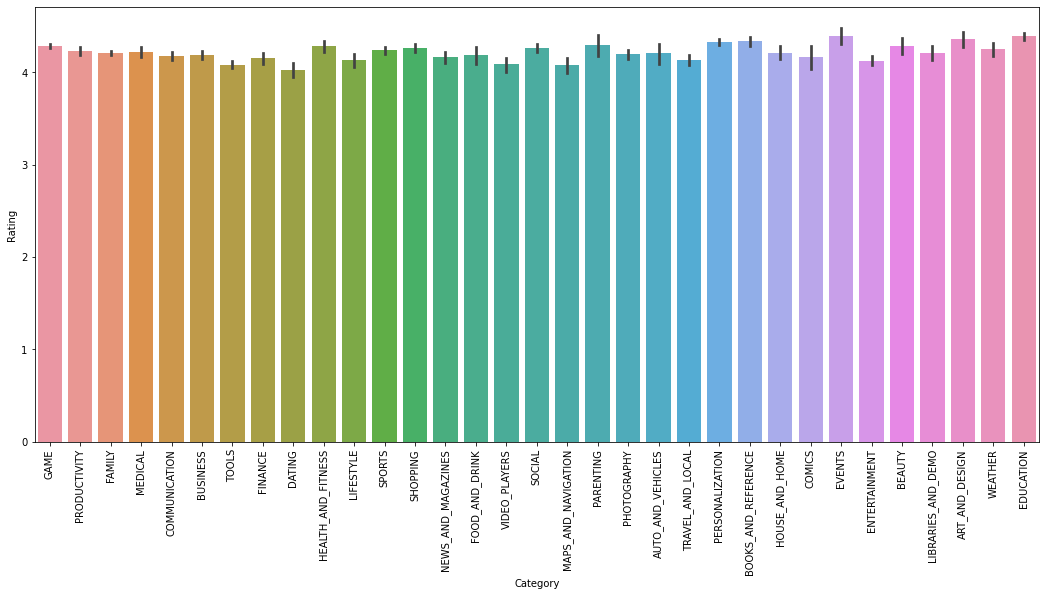

In [57]:
plt.figure(figsize=(18,8))
sns.barplot(data=data,x='Category',y='Rating')
plt.xticks(rotation=90)
plt.show()

This graph help us to uderstand that category ain't that much important for an app to gain ratings in the play store...

**Price vs Installs**

In [58]:
data['Rating'].groupby(data['Content Rating']).mean()

Content Rating
Adults only 18+    4.300000
Everyone           4.203248
Everyone 10+       4.258937
Mature 17+         4.136874
Teen               4.240315
Unrated            4.200000
Name: Rating, dtype: float64

In [59]:
data['Installs'].groupby(data['Content Rating']).mean()

Content Rating
Adults only 18+    6.666667e+05
Everyone           1.310037e+07
Everyone 10+       3.196590e+07
Mature 17+         1.107112e+07
Teen               2.873870e+07
Unrated            2.525000e+04
Name: Installs, dtype: float64

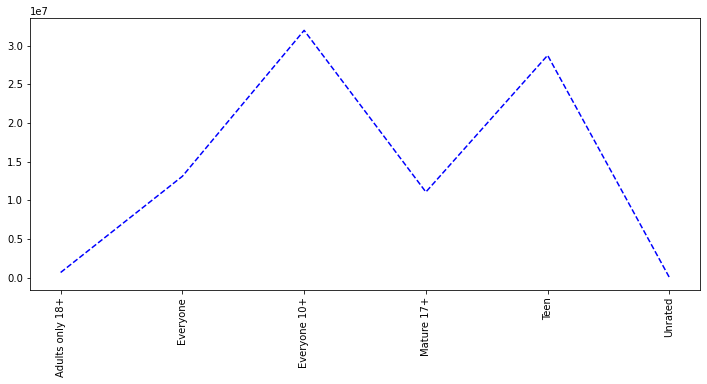

In [60]:
plt.figure(figsize = (12, 5))
plt.plot(data['Installs'].groupby(data['Content Rating']).mean(), 'r--', color='blue')
plt.xticks(rotation=90)
plt.show()

10+ and teen apps are the highest **installed**

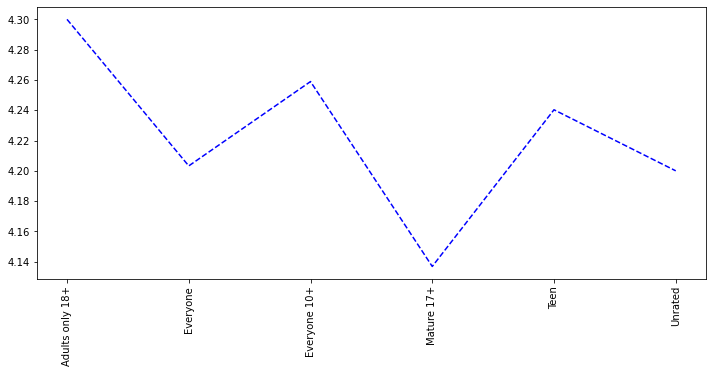

In [61]:
plt.figure(figsize = (12, 5))
plt.plot(data['Rating'].groupby(data['Content Rating']).mean(), 'r--', color='blue')
plt.xticks(rotation=90)
plt.show()

In [62]:
px.pie(data, values='Installs', names='Category', title='Distribution of installs for different categories')



from this we can uderstand that the category with the highest number of installs is gaming which is followed by communications which includes the apps like Facebook, Instagram, etc ....

<AxesSubplot:xlabel='Rating', ylabel='Density'>

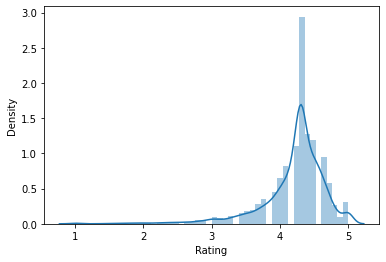

In [63]:
sns.distplot(data['Rating'])

**Type vs Installs**

In [64]:
px.bar(data_frame=data,x='Type',y='Installs')

from this plot we can notice that people prefer the free applications instead of the paid applications tho it is a given

**Category vs Earning**

In [65]:
data['Earnings'] = data['Installs']*data['Price']

In [66]:
data['Earnings'].groupby(data['Category']).mean()

Category
ART_AND_DESIGN            489.846154
AUTO_AND_VEHICLES        1178.217647
BEAUTY                      0.000000
BOOKS_AND_REFERENCE       390.591948
BUSINESS                 4453.354891
COMICS                      0.000000
COMMUNICATION           10975.102067
DATING                    377.613248
EDUCATION               15410.128205
ENTERTAINMENT            5355.704698
EVENTS                      1.718594
FAMILY                  94347.173103
FINANCE                 70291.472623
FOOD_AND_DRINK           2239.370079
GAME                    35828.353890
HEALTH_AND_FITNESS       5058.853079
HOUSE_AND_HOME              0.000000
LIBRARIES_AND_DEMO          1.164706
LIFESTYLE              150743.296859
MAPS_AND_NAVIGATION      9056.854015
MEDICAL                 29319.316782
NEWS_AND_MAGAZINES         22.773852
PARENTING                4165.983333
PERSONALIZATION         26216.702959
PHOTOGRAPHY             62456.022985
PRODUCTIVITY            10173.054127
SHOPPING                  115

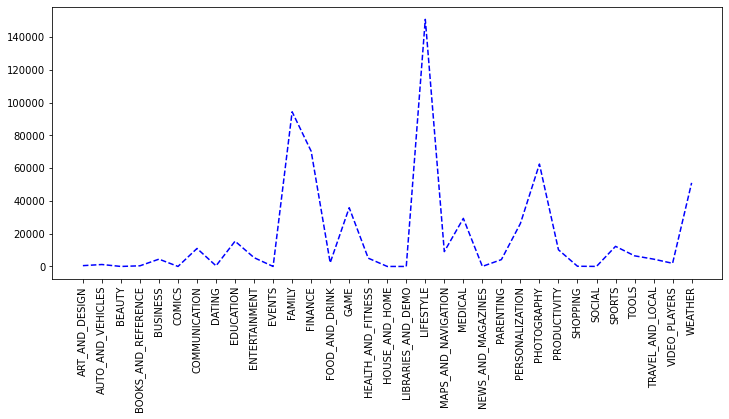

In [67]:
plt.figure(figsize = (12, 5))
plt.plot(data['Earnings'].groupby(data['Category']).mean(), 'r--', color='blue')
plt.xticks(rotation=90)
plt.show()

so now based on above we understood that Family, finance, lifestyle, photography and weather apps has the highest earners

**Content in playstore**

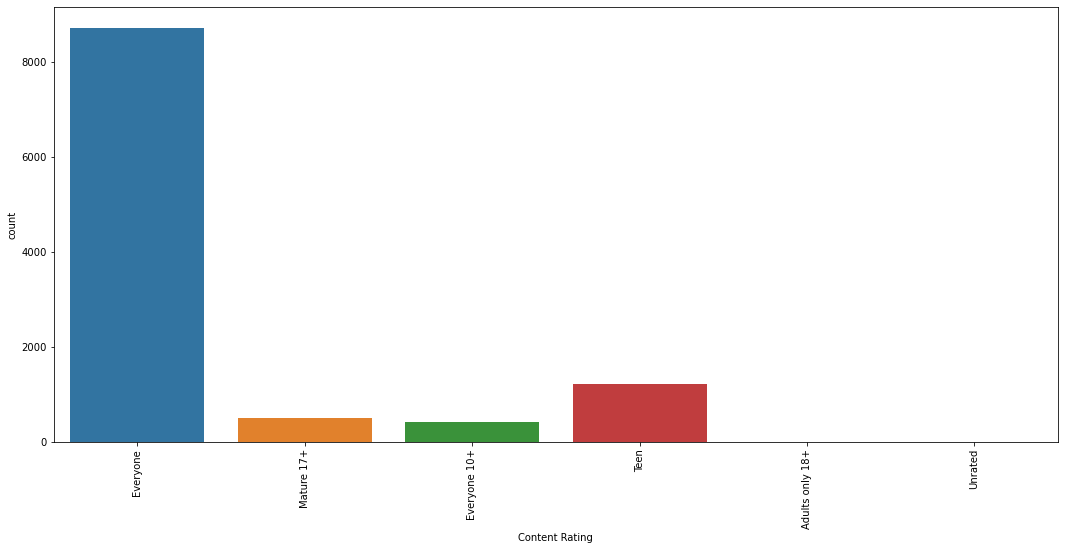

In [68]:
plt.figure(figsize=(18,8))
sns.countplot(data['Content Rating'])
plt.xticks(rotation=90)
plt.show()

this makes us understand that playstore is for everyone which is one reason for its popularity...

**Ratings Vs Reviews**

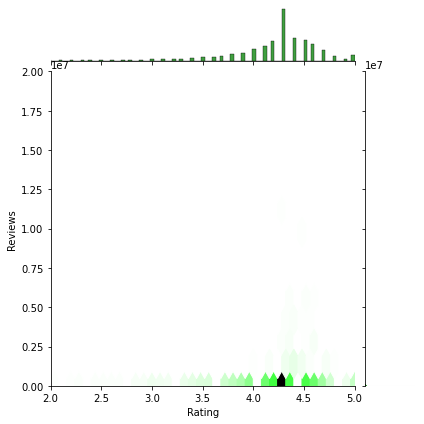

In [69]:
sns.jointplot(x='Rating',y='Reviews',data=data,kind='hex',color='Green',xlim={2,5},ylim={0,20000000})

Thus from this plot now its clears that the number of reviews are pretty low for all apps with higher ratings, so we can't compare the ratings evenly so let's get them all on even grounds by Demographic filtering...:)

**Installs vs Reviews**

In [70]:
# Logging Reviews and Installs columns are brought in scale with ratings for taking 10 to the power of value for profit and earnings
# Added +1 just to make values >=1 and avoid negative values in columns
data['Reviews_log'] = np.log10(data['Reviews']+1)
data['Installs_log'] = np.log10(data['Installs']+1)

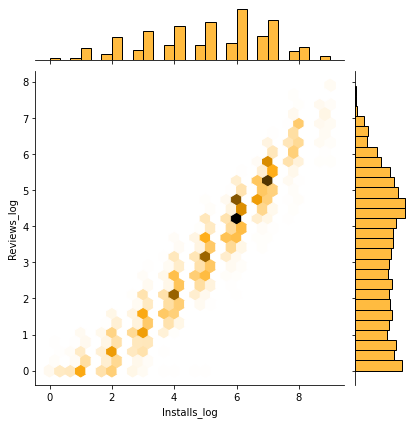

In [71]:
sns.jointplot(x='Installs_log', y='Reviews_log', data=data, color='orange', kind='hex') 

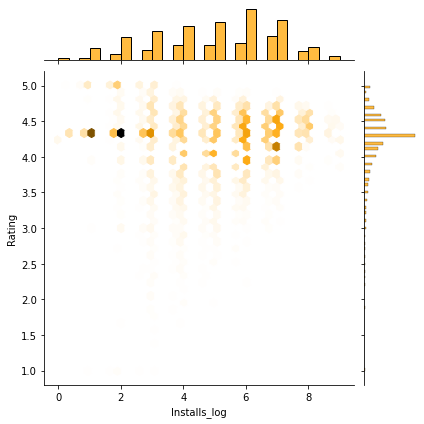

In [72]:
sns.jointplot(x='Installs_log', y='Rating', data=data, color='orange', kind='hex') 

**Demographic Filtering**

So now by using Demographic Filtering we get the best ranking score for these apps...

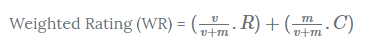

where:

v is the number of votes for the app;
m is the minimum votes required to be listed in the chart;
R is the average rating of the app; And
C is the mean vote across the whole report

In [73]:
C=data['Rating'].mean()
C

4.206476014760031

average of the apps ratings is 4.2(Approx.)

In [74]:
m= data['Reviews'].quantile(0.9)
m

464993.1000000003

Now lets filter the data

In [75]:
filter_data=data.copy().loc[data['Reviews'] >= m]

In [76]:
filter_data.shape

(1084, 16)

thus, it means 1084 apps have been cleared for the top list from the 10k apps

In [77]:
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['Rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [78]:
filter_data['Score'] = filter_data.apply(weighted_rating, axis=1)

now lets sort the data in decending order on the bases of the score and lets see the output...

In [79]:
filter_data=filter_data.sort_values('Score',ascending=False)

In [80]:
filter_data[['App','Reviews','Rating','Installs','Size','Score']].head()

,App,Reviews,Rating,Installs,Size,Score
1360,Period Tracker - Period Calendar Ovulation Tra...,4559407,4.8,100000000.0,21.51,4.745071
4038,"DU Recorder – Screen Recorder, Video Editor, Live",2588730,4.8,50000000.0,9.70,4.709624
4005,Clean Master- Space Cleaner & Antivirus,42916526,4.7,500000000.0,21.51,4.694710
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7,500000000.0,21.51,4.690953
1763,Piano Tiles 2™,8118880,4.7,100000000.0,21.51,4.673266


Thus this is our final results....

Now we are using pandas-profiling library to auto generate reports.

In [81]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [84]:
p = pandas_profiling.ProfileReport(data)
p.to_file(output_file="GoogleAppsRatingAnalysis.html")

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

thus we have attached the generated html report file along with the .ipynb submission